## Monte-Carlo simulations of 2-player games

$\textbf{Exercise 1}$. Two teams, say the Celtics and the Cavs, are playing a seven game series. The Cavs are a better team
and have a 60% chance of winning each game. Create a Monte Carlo simulation to confirm the probability that Celtics wins at least one game.

In [1]:
set.seed(1)
B <- 10000
celtic_wins <- replicate(B,any(sample(c("lose","win"), 4, replace = TRUE, prob = c(0.6, 0.4))=="win"))
mean(celtic_wins)

[1] 0.8757

$\textbf{Exercise 2}$. Two teams, say the Cavs and the Warriors, are playing a seven game championship series. The first to win four games wins the series. The teams are equally good, so they each have a 50-50 chance of winning each game. If the Cavs lose the first game, what is the probability that they win
the series?

First we compute the probability that the Cavs win the game series by using the definition $\mathbb{P}(A) = \dfrac{|A|}{|\Omega|}$. Let create a data frame $\textbf{'possibilities'}$ contains all combinations of possible outcomes and use $\textbf{mean}()$ to compute the probability.

In [2]:
# Assign a variable 'n' as the number of remaining games.
n <- 6

# Assign a variable `outcomes` as a vector of possible game outcomes, where 0 indicates a loss and 1 indicates a win for the Cavs.
outcomes <- c(0,1)

# Assign a variable `l` to a list of all possible outcomes in all remaining games. Use the `rep` function on `list(outcomes)` to create list of length `n`.
l <- rep(list(outcomes),n)

# Create a data frame named 'possibilities' that contains all combinations of possible outcomes for the remaining games.
possibilities <- expand.grid(l)

# Create a vector named 'results' that indicates whether each row in the data frame 'possibilities' contains enough wins for the Cavs to win the series.
results <- rowSums(possibilities)>=4

# Calculate the proportion of 'results' in which the Cavs win the series. Print the outcome to the console.
mean(results)

[1] 0.34375

Confirm the results of the previous question with a Monte Carlo simulation to estimate the probability of the Cavs winning the series after losing the first game.

In [3]:
# The variable `B` specifies the number of times we want the simulation to run. Let's run the Monte Carlo simulation 10,000 times.
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling.
set.seed(1)

# Create an object called `results` that replicates for `B` iterations a simulated series and determines whether that series contains at least four wins for the Cavs.

results <- replicate(B, sum(sample(c(0,1), 6, replace = TRUE, prob=c(0.5,0.5)))>=4)

# Calculate the frequency out of `B` iterations that the Cavs won at least four games in the remainder of the series. Print your answer to the console.

mean(results)

[1] 0.3444

## Functions for 2-player games

Two teams, $A$ and $B$, are playing a seven series game series. Team $A$ is better than team $B$ and has a $p>0.5$ chance of winning each game.

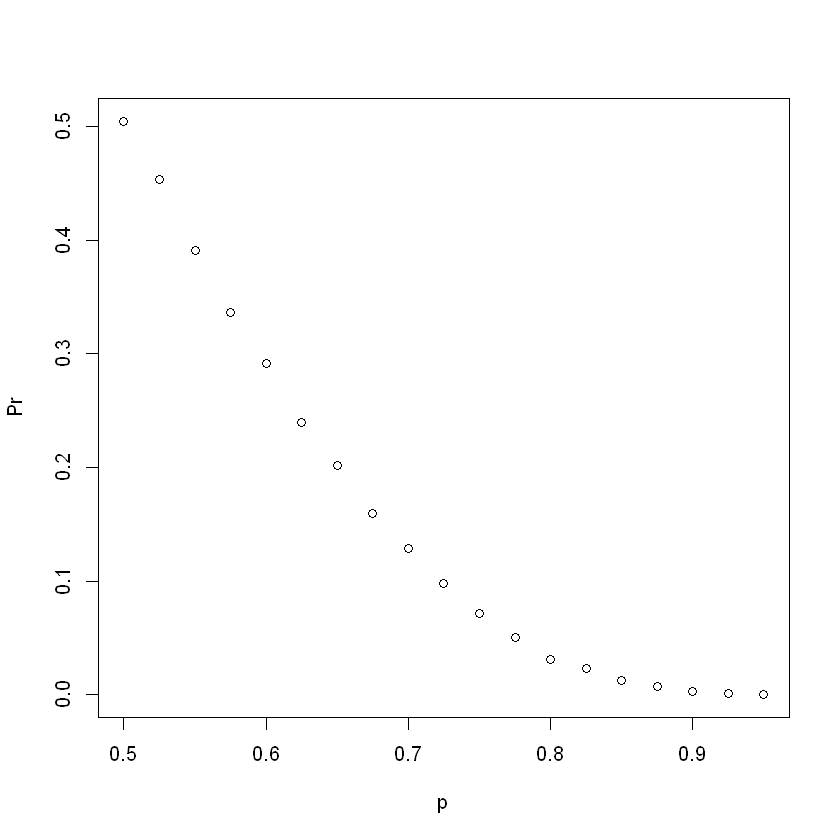

In [5]:
# Let's assign the variable 'p' as the vector of probabilities that team A will win.
p <- seq(0.5, 0.95, 0.025)

# Given a value 'p', the probability of winning the series for the underdog team B can be computed with the following function based on a Monte Carlo simulation:
prob_win <- function(p){
  B <- 10000
  result <- replicate(B, {
    b_win <- sample(c(1,0), 7, replace = TRUE, prob = c(1-p, p))
    sum(b_win)>=4
    })
  mean(result)
}

# Apply the 'prob_win' function across the vector of probabilities that team A will win to determine the probability that team B will win. Call this object 'Pr'.
Pr <- sapply(p, prob_win)

# Plot the probability 'p' on the x-axis and 'Pr' on the y-axis.
plot(p,Pr)

Repeat the previous exercise, but now keep the probability that team  wins fixed at $p \leftarrow 0.75$ and compute the probability for different series lengths. For example, wins in best of 1 game, 3 games, 5 games, and so on through a series that lasts 25 games.

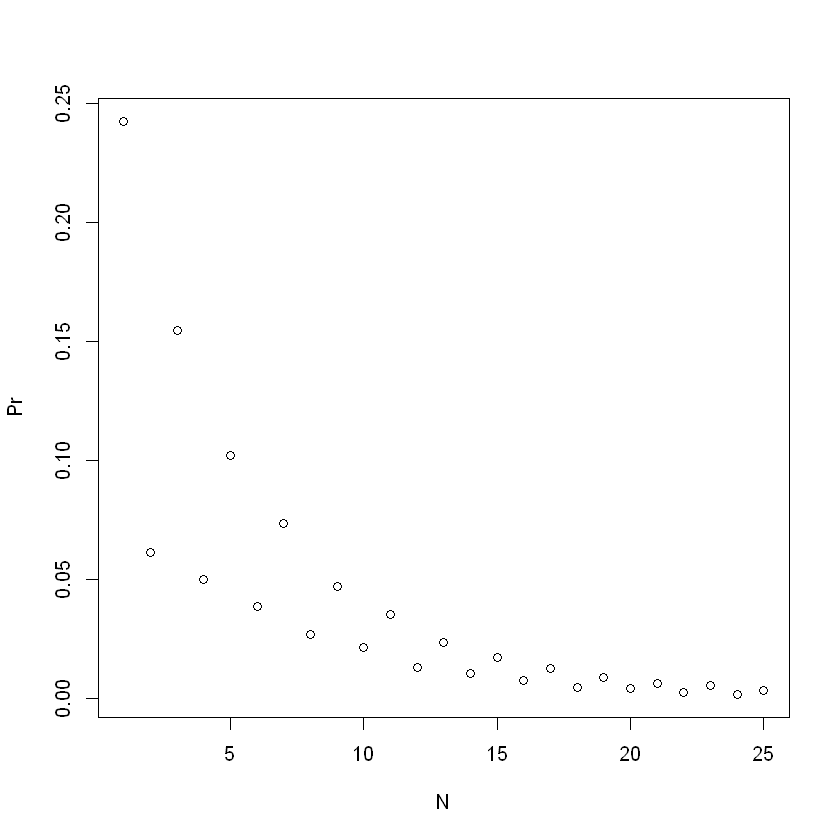

In [7]:
# Given a value 'p', the probability of winning the series for the underdog team B can be computed with the following function based on a Monte Carlo simulation:
prob_win <- function(N, p=0.75){
      B <- 10000
      result <- replicate(B, {
        b_win <- sample(c(1,0), N, replace = TRUE, prob = c(1-p, p))
        sum(b_win)>=(N+1)/2
        })
      mean(result)
    }

# Assign the variable 'N' as the vector of series lengths. Use only odd numbers ranging from 1 to 25 games.
N <- seq(1,25,1)

# Apply the 'prob_win' function across the vector of series lengths to determine the probability that team B will win. Call this object `Pr`.
Pr <- sapply(N, prob_win)

# Plot the number of games in the series 'N' on the x-axis and 'Pr' on the y-axis.
plot(N,Pr)